In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from stable_baselines3 import PPO
from rich import inspect

In [2]:
model = PPO.load("/scratch/hpc-prf-intexml/tklenke/repos/dacboenv/runs_ppo/PPO-norm-Perceptron/DACBO/dacbo_Cepisode_length_scaled_plus_logregret_AUCB-cont_Ssmart_Repisode_finished_scaled_Ibbob2d_3seeds/2/model")
model = PPO.load("../../runsicml/PPO-AlphaNet/DACBO/dacbo_Csymlogregret_AWEI-cont_Ssawei_Rsymlogregret-SMAC3-BlackBoxFacade_Ibbob2d_3seeds/3/rl_model_1232000_steps.zip")

In [26]:
# inspect(model.policy, all=True)
print(model.policy)
import matplotlib.pyplot as plt
import seaborn as sns
for name, param in model.policy.named_parameters():
    if "value" not in name:
        print(name, param.shape, param)
        # if name == "mlp_extractor.policy_net.0.weight":
        #     sns.heatmap(param.detach().numpy())
        #     plt.show()

MultiInputActorCriticPolicy(
  (features_extractor): CombinedExtractor(
    (extractors): ModuleDict(
      (acq_value_PI): Flatten(start_dim=1, end_dim=-1)
      (acq_value_WEI_explore): Flatten(start_dim=1, end_dim=-1)
      (previous_param): Flatten(start_dim=1, end_dim=-1)
      (ubr_smoothed_gradient): Flatten(start_dim=1, end_dim=-1)
    )
  )
  (pi_features_extractor): CombinedExtractor(
    (extractors): ModuleDict(
      (acq_value_PI): Flatten(start_dim=1, end_dim=-1)
      (acq_value_WEI_explore): Flatten(start_dim=1, end_dim=-1)
      (previous_param): Flatten(start_dim=1, end_dim=-1)
      (ubr_smoothed_gradient): Flatten(start_dim=1, end_dim=-1)
    )
  )
  (vf_features_extractor): CombinedExtractor(
    (extractors): ModuleDict(
      (acq_value_PI): Flatten(start_dim=1, end_dim=-1)
      (acq_value_WEI_explore): Flatten(start_dim=1, end_dim=-1)
      (previous_param): Flatten(start_dim=1, end_dim=-1)
      (ubr_smoothed_gradient): Flatten(start_dim=1, end_dim=-1)
    )


In [4]:
model.policy.features_extractor


CombinedExtractor(
  (extractors): ModuleDict(
    (acq_value_PI): Flatten(start_dim=1, end_dim=-1)
    (acq_value_WEI_explore): Flatten(start_dim=1, end_dim=-1)
    (previous_param): Flatten(start_dim=1, end_dim=-1)
    (ubr_smoothed_gradient): Flatten(start_dim=1, end_dim=-1)
  )
)

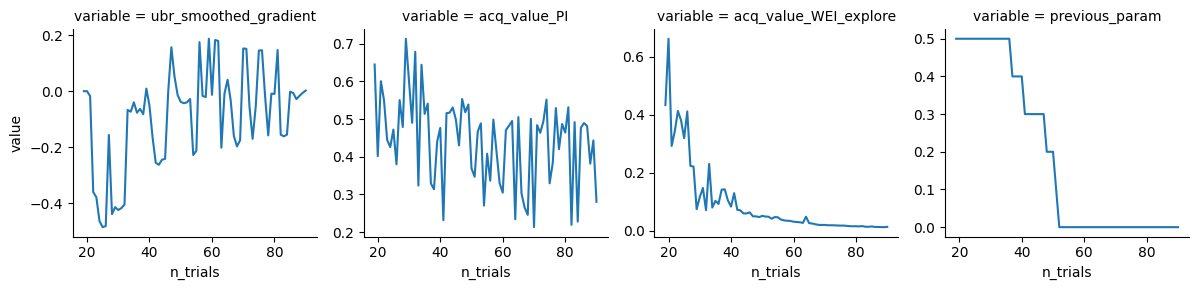

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from carps.analysis.gather_data import read_jsonl_content

fn = "/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/runstmp/SAWEI/BBOB/bbob/2/1/0/1/DACBOEnvLogs.jsonl"
fn = "/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/runstmp/SAWEI/YAHPO/yahpo/so/nb301/CIFAR10/None/1/DACBOEnvLogs.jsonl"
fn = "/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/runstmp/SAWEI/YAHPO/yahpo/so/nb301/CIFAR10/None/3/DACBOEnvLogs.jsonl"
fn = "/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/runstmp/SAWEI-P/BNNBO/bnnbo/TensionCompressionString/3/DACBOEnvLogs.jsonl"
obs = read_jsonl_content(fn)
obs_orig = obs.copy()
obs_keys = list(obs.iloc[0]["observation"].keys())
expanded = obs["observation"].apply(pd.Series)
expanded.columns = obs_keys
obs = obs.drop(columns="observation").join(expanded)
# obs["exploring"] = obs["acq_value_PI"] <= obs["acq_value_WEI_explore"]
# obs["diff_EI"] = obs["acq_value_EI"] - obs["acq_value_WEI_explore"]
# obs["diff"] = obs["acq_value_EI"] - obs["acq_value_WEI_explore"]
obs_wide = obs.copy()
obs = obs.melt(id_vars=["n_trials"], value_vars=obs_keys)


grid = sns.FacetGrid(data=obs, col="variable", col_wrap=5, sharex=True, sharey=False)
grid.map_dataframe(sns.lineplot, x="n_trials", y="value")
# grid.axes.flat[-2].set_yscale("log")
plt.show()

In [37]:
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize
from omegaconf import OmegaConf
from hydra.utils import instantiate
import dacboenv

config_fn = "/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/runsicml/PPO-AlphaNet/DACBO/dacbo_Csymlogregret_AWEI-cont_Ssawei_Rsymlogregret-SMAC3-BlackBoxFacade_Ibbob2d_3seeds/3/.hydra/config.yaml"
normalization_wrapper = "/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/runsicml/PPO-AlphaNet/DACBO/dacbo_Csymlogregret_AWEI-cont_Ssawei_Rsymlogregret-SMAC3-BlackBoxFacade_Ibbob2d_3seeds/3/rl_model_vecnormalize_1232000_steps.pkl"

config = OmegaConf.load(config_fn)
config.dacboenv.evaluation_mode = True
env = instantiate(config.dacboenv)
env.reset()
vec_env = DummyVecEnv([lambda: env])
vec_env = VecNormalize.load(normalization_wrapper, vec_env)
vec_env.training = False
vec_env.norm_reward = False
# obs = vec_env.normalize_obs(obs)

[08:38:07 PM] INFO     Env is in evaluation mode! This means that a reward is not calculated, and   ]8;id=970808;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/dacboenv/dacboenv.py\dacboenv.py]8;;\:]8;id=548595;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/dacboenv/dacboenv.py#173\173]8;;\
                       episodes will be full length.                                                               

[08:38:08 PM] INFO     Reducing the number of initial configurations from 16 to 15    ]8;id=167142;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/SMAC3/smac/initial_design/abstract_initial_design.py\abstract_initial_design.py]8;;\:]8;id=795062;file:///scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/lib/SMAC3/smac/initial_design/abstract_initial_design.py#91\91]8;;\
                       (max_ratio == 0.2).                                                                         

FileNotFoundError: [Errno 2] No such file or directory: 'dacboenv/configs/logging/smac_internal.yaml'